
**Python Blok Projesi**<p><img style="float: right;margin:5px 20px 5px 1px; max-width:250px" src="https://assets.datacamp.com/production/project_441/img/Nobel_Prize.png"></p>

<p>Nobel Ödülü belki de dünyanın en tanınmış bilimsel ödülüdür. Her yıl kimya, edebiyat, fizik, tıp, ekonomi ve barış alanlarında bilim insanlarına ve akademisyenlere verilmektedir. Bu projede, Nobel Ödülü kazananları inceleyeceğiz. </p>

## Proje Soruları

1. Nobel Ödüllerini en çok kazanan ilk on ülkeyi bulunuz.
2. Nobel Ödüllerini kazanan ilk kadınları listeleyiniz.
3. Nobel Ödüllerini kazanan ilk erkekleri listeleyiniz.
4. Nobel ödülünü en çok kazanan ülkenin hangi yıldan itibaren hakimiyet sağladığını görselleştirip bu hakimiyette rol oynayan şeyler nelerdir? İçgörülerinizi paylaşır mısınız?
5. Nobel Ödülü kazananların cinsiyetlerini, yaşlarını, ödül kategorisi ve yılları kullanarak görselleştiriniz.(Her bir ödül kategorisi için ayrı grafik gösteriniz) Çıkan sonuçlara göre görseli yorumlayınız.
6. 1938-1945 yılı arasında Nobel Ödülü kazananların kategorilerini ve ülkelerini görselleştirip yorumlayınız.
7. 1947-1991 yılları arasında Nobel Ödülü kazananların kategorilerini ve ülkelerini görselleştirip yorumlayınız.(Her kategori için ayrı bir grafik olması istenmektedir)
8. Kimya, Edebiyat, Barış, Fizik ve Tıp kategorilerindeki 2000 sonrasındaki kişilerin ülkelerini, yaşlarını görselleştirin.(Her bir Kategori için ayrı görselleştirme yapılması istenmektedir) Veriyi yorumlayınız.


In [48]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [49]:
df = pd.read_csv("nobel.csv")

#  EDA

In [50]:
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [51]:
df.shape

(911, 18)

In [52]:
df.isna().sum()

year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               28
birth_city               28
birth_country            26
sex                      26
organization_name       246
organization_city       244
organization_country    244
death_date              318
death_city              335
death_country           329
dtype: int64

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  911 non-null    int64 
 1   category              911 non-null    object
 2   prize                 911 non-null    object
 3   motivation            823 non-null    object
 4   prize_share           911 non-null    object
 5   laureate_id           911 non-null    int64 
 6   laureate_type         911 non-null    object
 7   full_name             911 non-null    object
 8   birth_date            883 non-null    object
 9   birth_city            883 non-null    object
 10  birth_country         885 non-null    object
 11  sex                   885 non-null    object
 12  organization_name     665 non-null    object
 13  organization_city     667 non-null    object
 14  organization_country  667 non-null    object
 15  death_date            593 non-null    ob

In [54]:
df.nunique()

year                    113
category                  6
prize                   579
motivation              565
prize_share               4
laureate_id             904
laureate_type             2
full_name               904
birth_date              868
birth_city              601
birth_country           121
sex                       2
organization_name       295
organization_city       181
organization_country     29
death_date              582
death_city              291
death_country            50
dtype: int64

# Sorular ve Cevapları

In [55]:
# 1. Nobel Ödüllerini en çok kazanan ilk on ülkeyi bulunuz.

country_count = df['birth_country'].value_counts()

top_10_countries = country_count.head(10)

print(top_10_countries)
print(df.shape)

birth_country
United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Canada                       18
Netherlands                  18
Italy                        17
Russia                       17
Name: count, dtype: int64
(911, 18)


In [56]:
# 2. Nobel Ödüllerini kazanan ilk kadınları listeleyiniz.

female_winners = df[df['sex'] == 'Female']

female_winners_sorted = female_winners.sort_values(by='year')

first_women = female_winners_sorted.drop_duplicates(subset="full_name", keep="first")

print(first_women[['full_name', 'year']])

                                             full_name  year
19                         Marie Curie, née Sklodowska  1903
29   Baroness Bertha Sophie Felicita von Suttner, n...  1905
51                       Selma Ottilia Lovisa Lagerlöf  1909
128                                     Grazia Deledda  1926
141                                      Sigrid Undset  1928
160                                        Jane Addams  1931
179                                 Irène Joliot-Curie  1935
198                                         Pearl Buck  1938
218                                   Gabriela Mistral  1945
229                                 Emily Greene Balch  1946
235                    Gerty Theresa Cori, née Radnitz  1947
351                               Maria Goeppert Mayer  1963
353                           Dorothy Crowfoot Hodgkin  1964
372                                        Nelly Sachs  1966
468                                     Betty Williams  1976
469                     

In [57]:
# 3. Nobel Ödüllerini kazanan ilk erkekleri listeleyiniz.

male_winners = df[df['sex'] == 'Male']

male_winners_sorted = male_winners.sort_values(by='year')

first_men = male_winners_sorted.drop_duplicates(subset="full_name", keep="first")

print(first_men[['full_name', 'year']])

                        full_name  year
0    Jacobus Henricus van 't Hoff  1901
1                 Sully Prudhomme  1901
2          Emil Adolf von Behring  1901
3               Jean Henry Dunant  1901
4                  Frédéric Passy  1901
..                            ...   ...
905                     Bob Dylan  2016
906              Yoshinori Ohsumi  2016
907            Juan Manuel Santos  2016
908             David J. Thouless  2016
910         J. Michael Kosterlitz  2016

[833 rows x 2 columns]


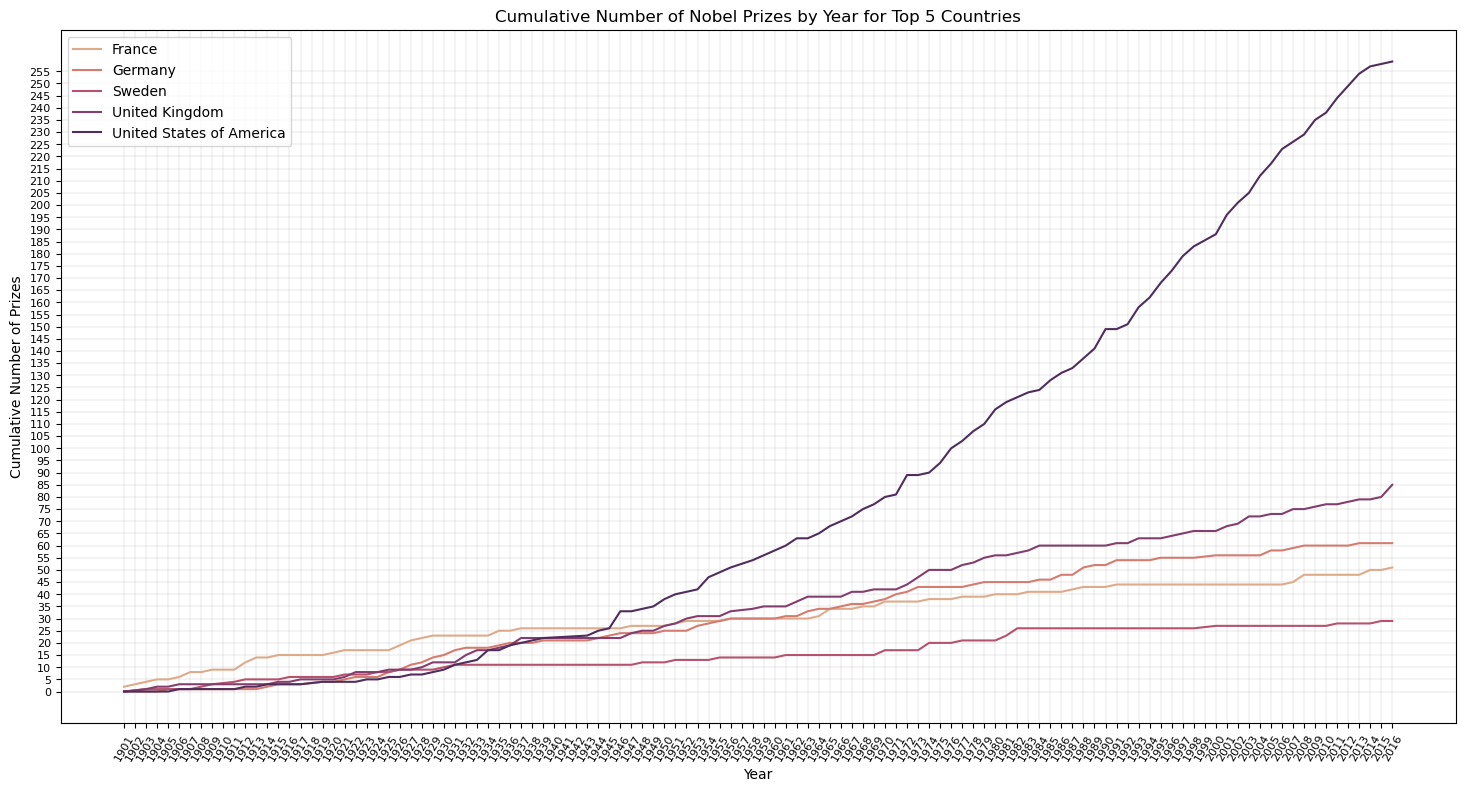

In [58]:
# 4. Nobel ödülünü en çok kazanan ülkenin hangi yıldan itibaren hakimiyet sağladığını görselleştirip bu hakimiyette rol oynayan şeyler nelerdir?
# İçgörülerinizi paylaşır mısınız?

country_prizes_count = df['birth_country'].value_counts().nlargest(5)

top_countries_data = df[df['birth_country'].isin(country_prizes_count.index)]

grouped_data = top_countries_data.groupby(['year', 'birth_country']).size().unstack().fillna(0)

cumulative_prizes_per_country = grouped_data.cumsum()

cumulative_prizes_per_country.plot(kind='line', figsize=(18, 9), color=('#deab8a' ,'#d47c6f','#b5536e', '#843e6d','#4f2d5c'))

plt.title('Cumulative Number of Nobel Prizes by Year for Top 5 Countries')
plt.xlabel('Year')
plt.ylabel('Cumulative Number of Prizes')
plt.xticks(range(1901, 2017, 1), rotation=60, fontsize=8)
plt.yticks(range(0, int(cumulative_prizes_per_country.max().max())+1, 5), fontsize=8)
plt.grid(True, linewidth=0.2)
plt.legend()

plt.show()


In [59]:
df.dropna(subset=['birth_date', 'death_date', 'sex', 'category', 'year'], inplace=True)

In [60]:
# 5. Nobel Ödülü kazananların cinsiyetlerini, yaşlarını, ödül kategorisi ve yılları kullanarak görselleştiriniz.
# (Her bir ödül kategorisi için ayrı grafik gösteriniz) Çıkan sonuçlara göre görseli yorumlayınız.

df['birth_year'] = pd.to_datetime(df['birth_date']).dt.year

df['age'] = df['year'] - df['birth_year']

df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,birth_year,age
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,1852,49
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,1839,62
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,1854,47
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,1828,73
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,1822,79


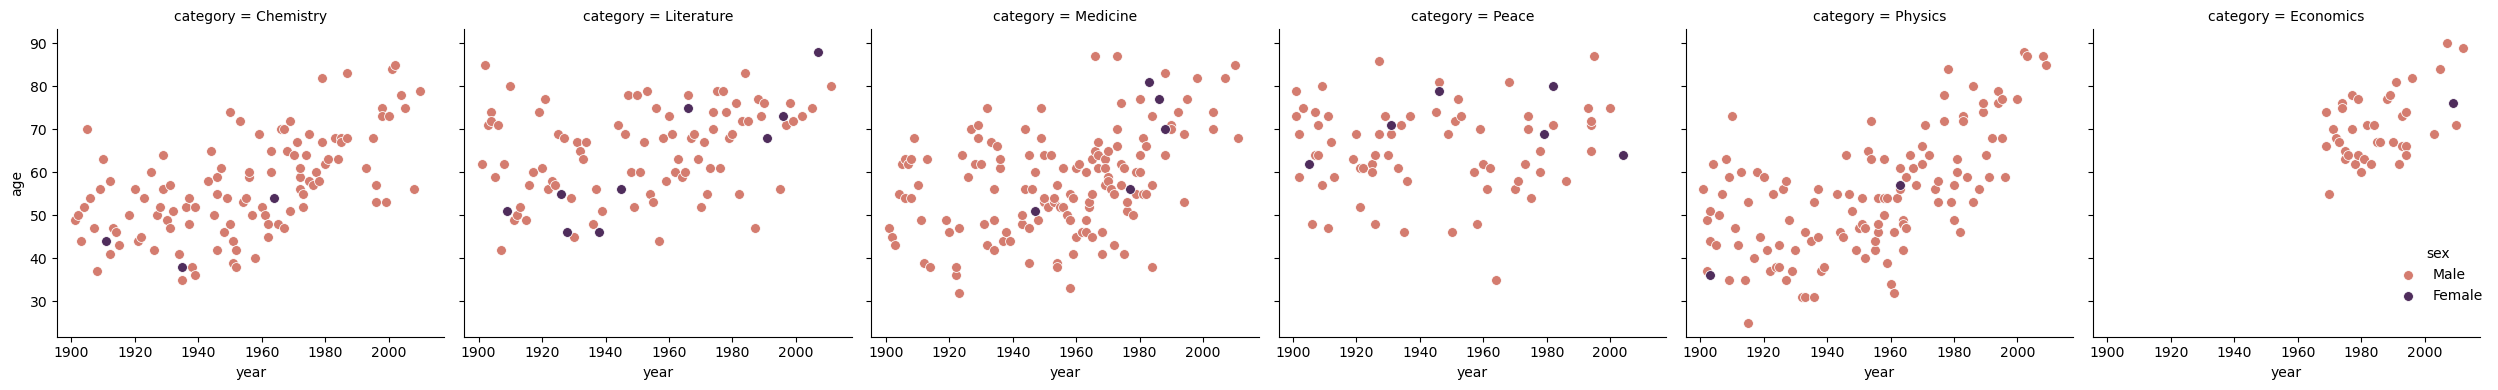

In [61]:
import warnings
warnings.filterwarnings("ignore")

palette = {'Male': '#d47c6f', 'Female': '#4f2d5c'}

g = sns.FacetGrid(df, col="category", hue="sex", palette=palette, height=4, aspect=1)
g.map(sns.scatterplot, "year", "age", alpha = 1, s=50)
g.add_legend(loc='lower right', bbox_to_anchor=(1, 0.2), fontsize='medium')
plt.tight_layout()
plt.show()

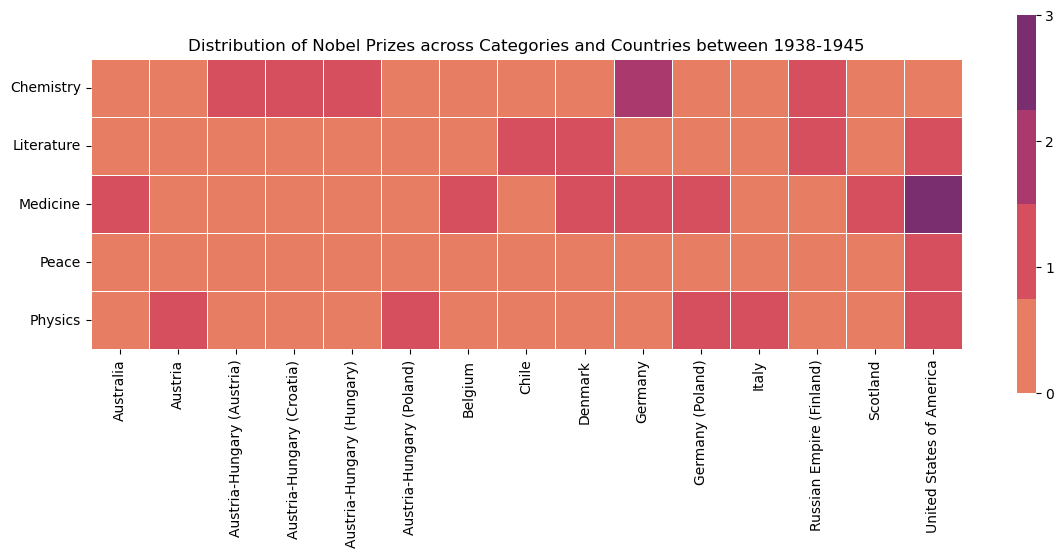

In [62]:
# 6. 1938-1945 yılı arasında Nobel Ödülü kazananların kategorilerini ve ülkelerini görselleştirip yorumlayınız.

filtered_data = df[(df['year'] >= 1938) & (df['year'] <= 1945)]

grouped_data = filtered_data.groupby(['category', 'birth_country']).size().unstack().fillna(0)

data_min = grouped_data.min().min()
data_max = grouped_data.max().max()

num_ticks = int(data_max - data_min + 1)
colors = sns.color_palette("flare", n_colors=num_ticks)

custom_cmap = sns.color_palette(colors, as_cmap=True)

integer_ticks = range(int(grouped_data.min().min()), int(grouped_data.max().max()) + 1)

plt.figure(figsize=(12, 8))
sns.heatmap(grouped_data, cmap=custom_cmap, linewidths=.5, square=(4,4), cbar_kws={"shrink": 0.5, "ticks": integer_ticks})
plt.title('Distribution of Nobel Prizes across Categories and Countries between 1938-1945')
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(rotation=90)
plt.yticks(rotation = 0)
plt.tight_layout()
plt.show()


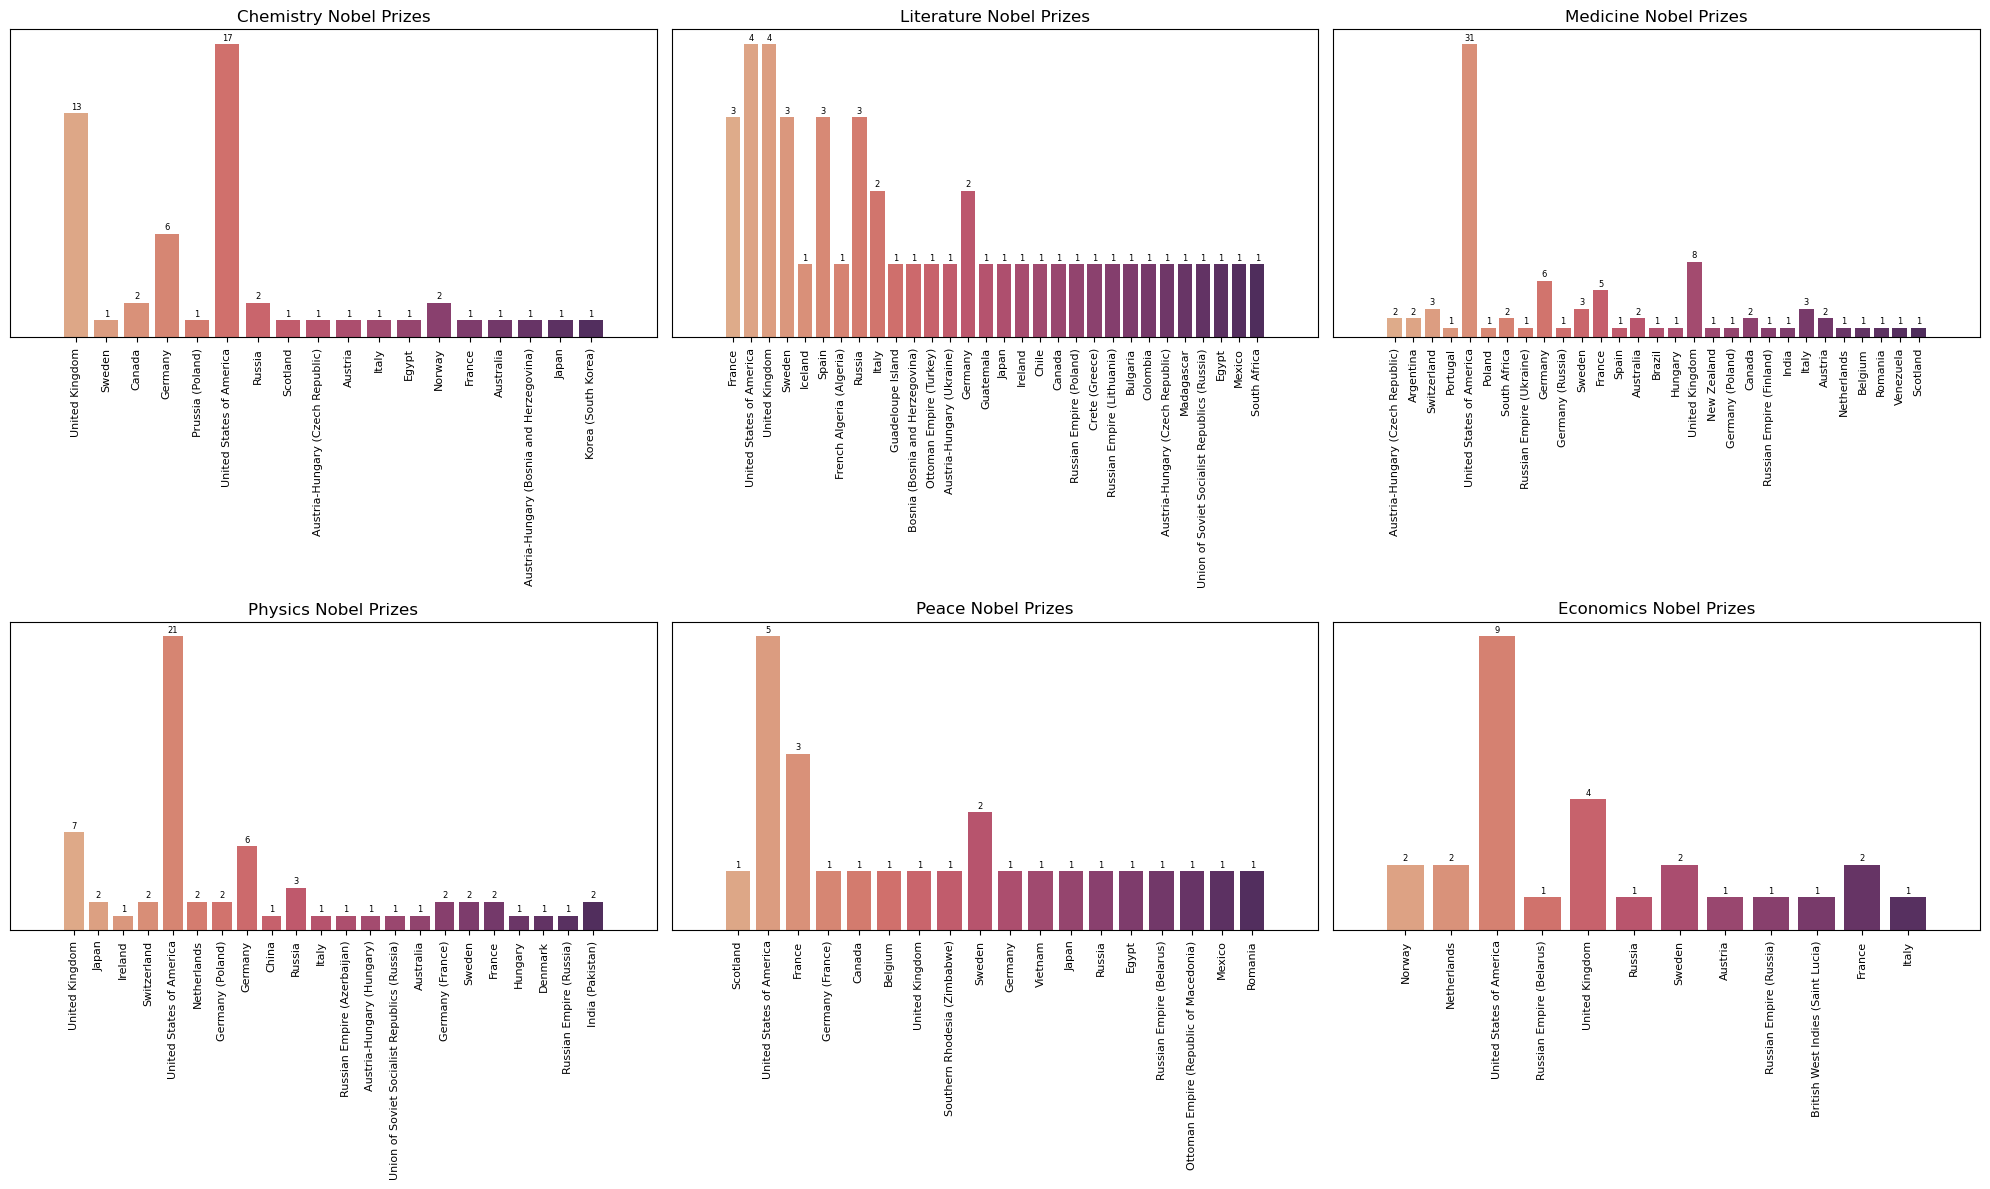

In [63]:
# 7. 1947-1991 yılları arasında Nobel Ödülü kazananların kategorilerini ve ülkelerini görselleştirip yorumlayınız.(Her kategori için ayrı bir grafik olması istenmektedir)

filtered_data = df[(df['year'] >= 1947) & (df['year'] <= 1991)]

categories = filtered_data['category'].unique()

num_plots = len(categories)
cols = 3
rows = (num_plots + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(20, 12))

for i, category in enumerate(categories):
    row = i // cols
    col = i % cols
    ax = axes[row, col]
    sns.countplot(data=filtered_data[filtered_data['category'] == category], x='birth_country', palette='flare', ax=ax)
    ax.set_title(f'{category} Nobel Prizes')
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.tick_params(axis='x', rotation=90, labelsize=8)
    ax.set_yticks([])
    ax.margins(x=0.1)
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 5), 
                    textcoords='offset points',
                    fontsize=6)

plt.tight_layout()
plt.show()

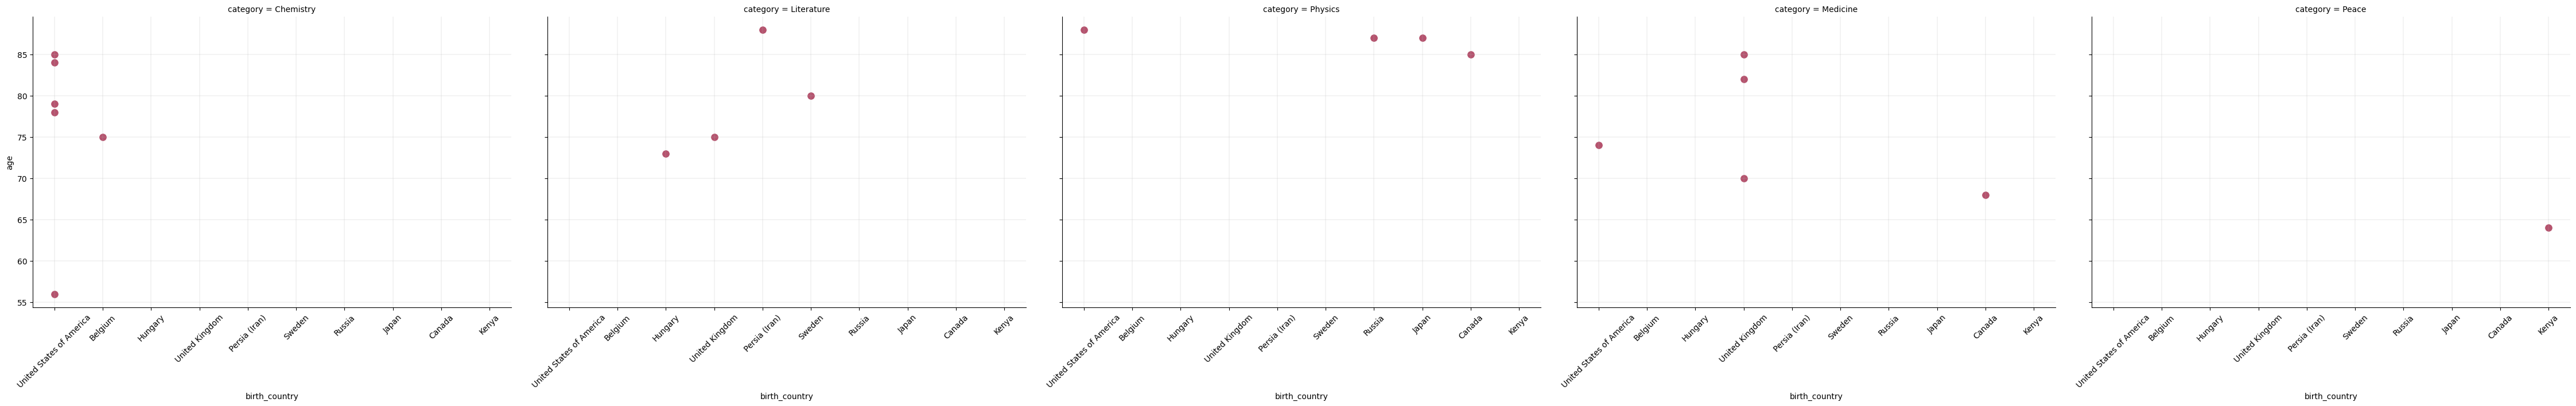

In [64]:
# 8. Kimya, Edebiyat, Barış, Fizik ve Tıp kategorilerindeki 2000 sonrasındaki kişilerin ülkelerini, yaşlarını görselleştirin.
# (Her bir Kategori için ayrı görselleştirme yapılması istenmektedir) Veriyi yorumlayınız.

filtered_data = df[(df['year'] > 2000)]
included_categories = ['Chemistry', 'Literature', 'Peace', 'Physics', 'Medicine']

filtered_data = filtered_data[filtered_data['category'].isin(included_categories)]

g = sns.FacetGrid(filtered_data, col="category", height=6, aspect=1.5)
g.map(sns.scatterplot, "birth_country", "age", alpha=1, s=100, color='#b5536e')

for ax in g.axes.flat:
    ax.grid(True, linewidth=0.2)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show()